In [22]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.impute import SimpleImputer

# Loading the dataset
# Loading the dataset with proper encoding and skip problematic lines
df = pd.read_csv('ecommerce_furniture_dataset_2024.csv', encoding='latin1', on_bad_lines='skip')

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1998 entries, 0 to 1997
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   productTitle   1998 non-null   object
 1   originalPrice  487 non-null    object
 2   price          1998 non-null   object
 3   sold           1998 non-null   int64 
 4   tagText        1995 non-null   object
dtypes: int64(1), object(4)
memory usage: 78.2+ KB


In [24]:
# Display the first few rows of the dataset
df.head()

,productTitle,originalPrice,price,sold,tagText
0,Dresser For Bedroom With 9 Fabric Drawers Ward...,NaN,$46.79,600,Free shipping
1,Outdoor Conversation Set 4 Pieces Patio Furnit...,NaN,$169.72,0,Free shipping
2,Desser For Bedroom With 7 Fabric Drawers Organ...,$78.4,$39.46,7,Free shipping
3,"Modern Accent Boucle Chair,Upholstered Tufted ...",NaN,$111.99,0,Free shipping
4,Small Unit Simple Computer Desk Household Wood...,$48.82,$21.37,1,Free shipping


In [26]:
# Handle Missing Values
# Fill missing values in 'originalPrice' with values from 'price'
df['originalPrice'] = df['originalPrice'].fillna(df['price'])

In [28]:
# Fill missing values in 'tagText' with "No tag"
df['tagText'] = df['tagText'].fillna('No tag')

In [29]:
# Fill missing values in 'price' with the mean price
df['price'] = pd.to_numeric(df['price'].str.replace('$', '', regex=False), errors='coerce')
df['price'] = df['price'].fillna(df['price'].mean())

In [30]:
# Fill missing values in 'originalPrice' after converting to numeric
df['originalPrice'] = pd.to_numeric(df['originalPrice'].str.replace('$', '', regex=False), errors='coerce')
df['originalPrice'] = df['originalPrice'].fillna(df['originalPrice'].mean())

In [31]:
# Convert 'sold' to numeric and fill missing values with 0
df['sold'] = pd.to_numeric(df['sold'], errors='coerce')
df['sold'] = df['sold'].fillna(0)


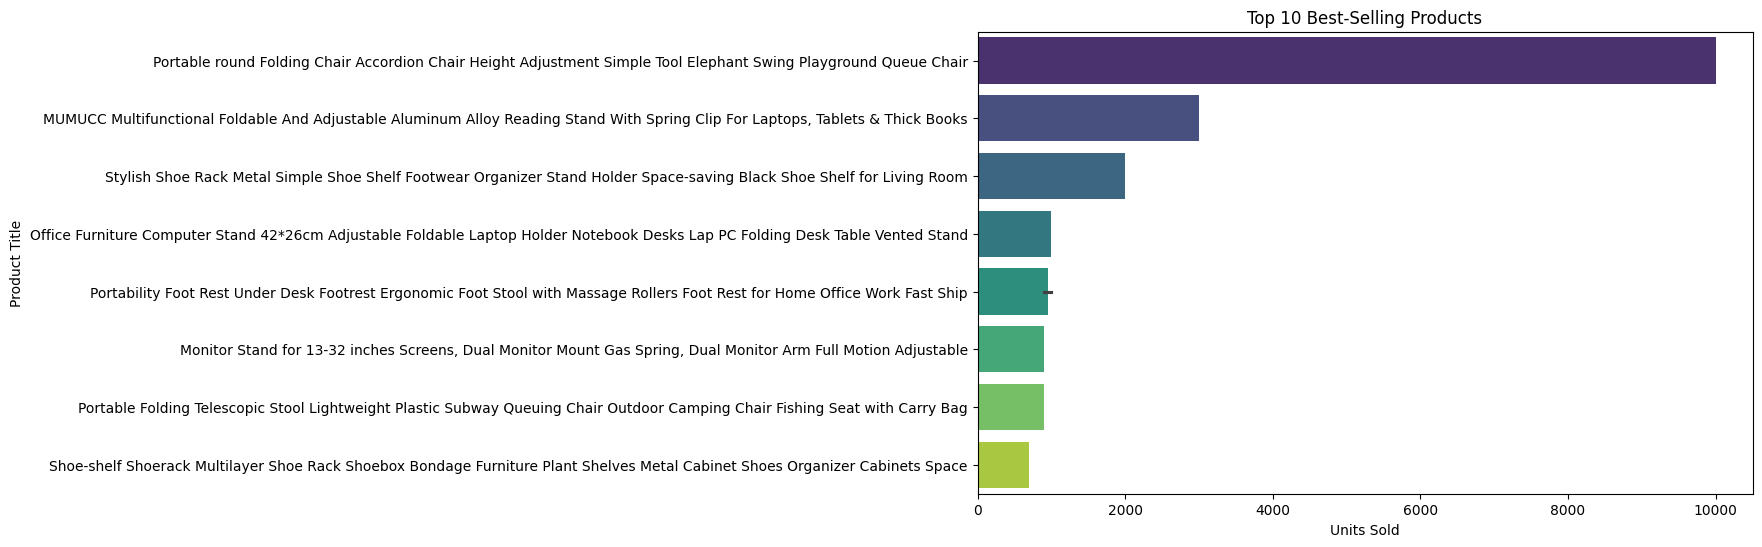

In [33]:
# Exploratory Data Analysis (EDA)
# Top 10 Best-Selling Products
plt.figure(figsize=(10, 6))
sns.barplot(x='sold', y='productTitle', data=top_products, palette='viridis', hue='productTitle', dodge=False)
plt.title('Top 10 Best-Selling Products')
plt.xlabel('Units Sold')
plt.ylabel('Product Title')
plt.legend([], [], frameon=False)  # Removes unnecessary legend
plt.show()


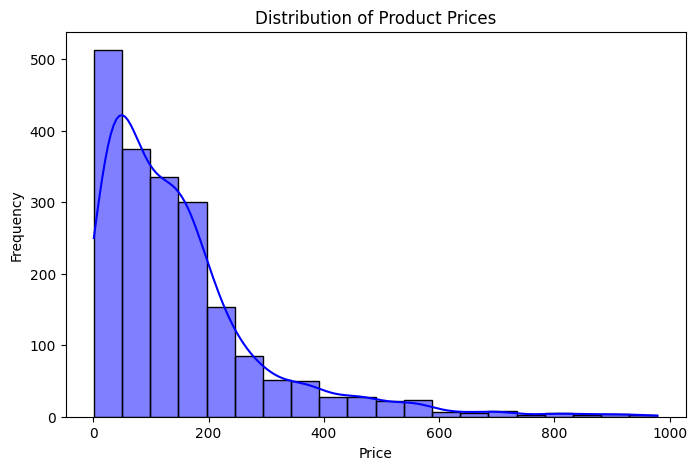

In [34]:
# Distribution of Product Prices
plt.figure(figsize=(8, 5))
sns.histplot(df['price'], kde=True, bins=20, color='blue')
plt.title('Distribution of Product Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

In [35]:
# Predictive Modeling (Linear Regression)

# Define input features (X) and target variable (y)
X = df[['originalPrice', 'sold']]  # Features
y = df['price']  # Target variable

# Handle missing values in X (if any)
imputer = SimpleImputer(strategy='mean')
X = imputer.fit_transform(X)

# Train the Linear Regression model
model = LinearRegression()
model.fit(X, y)

# Make predictions
predictions = model.predict(X)

# Display first 10 predictions
print("Predicted prices for the first 10 products:\n", predictions[:10])

Predicted prices for the first 10 products:
 [ 52.88178488 154.03957883  83.60883028 109.56275477  60.8840525
 149.2729236  176.05537468 149.78884733  57.11827428 203.02340828]


In [37]:
# Final Output and Summary
print("\nProject completed successfully.")


Project completed successfully.
